In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic = titanic[["Survived", "Pclass", "Sex", "Age", "Fare"]]
titanic["Sex"] = titanic["Sex"].map({"male":1 , "female":0})
titanic=titanic.dropna()
print(titanic.head())

   Survived  Pclass  Sex   Age     Fare
0         0       3    1  22.0   7.2500
1         1       1    0  38.0  71.2833
2         1       3    0  26.0   7.9250
3         1       1    0  35.0  53.1000
4         0       3    1  35.0   8.0500


In [52]:
X = titanic.drop("Survived", axis=1)
Y = titanic["Survived"]
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
model = LogisticRegression()
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.76


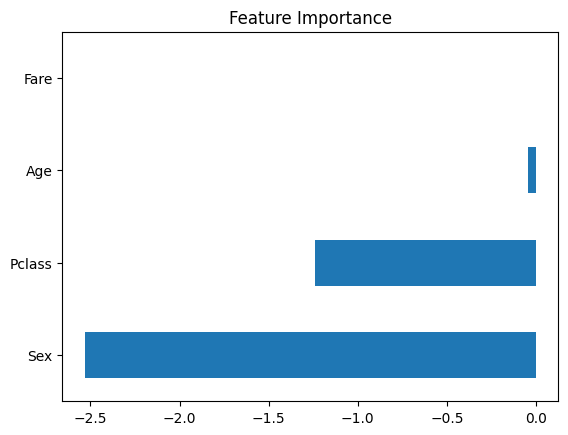

In [55]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind="barh")
plt.title("Feature Importance")
plt.show()